# Richness of function class for shallow and deep ReLU networks

This notebook shows simple examples of shallow and deep ReLU networks to illustrate the representation capacity of networks with rectified linear units.

In [ ]:
import jax.numpy as np
from jax.nn import relu
from matplotlib import pylab as plt
import seaborn as sns
import jax.random as random
randomKey = random.PRNGKey(1337)

In [ ]:
x = np.linspace(-2.2,2.2,500)

##Shallow ReLU network

This illustrates a single hidden layer ReLU network with 1D input and 1D output with 10 units. Such network is defined as:

$$
f(x) = w^T_2 \operatorname{ReLU}(w_1x - b_1)
$$

We draw parameters $b_1$, $w_1$ and $w_2$ randomly from distributions that will make visualisation convenient.

In [ ]:
key, subkey = random.split(randomKey)
W1 = random.uniform(subkey, shape=(10, 1), minval=-1, maxval=1)
key, subkey = random.split(key)
b1 = random.uniform(subkey, shape=(10, 1), minval=-2, maxval=2)*W1
key, subkey = random.split(key)
W2 = random.uniform(subkey, shape=(10, 1), minval=-1, maxval=1)

Here we compute the hidden layer activations, and the function's output. 

In [ ]:
first_layer_activations = relu(W1*x + b1)
function_output = np.dot(W2.T, first_layer_activations)

Let's first look how each of the ReLU units behave. The different colour plots will show the activation of each of the 10 units as a function of the input $x$. They all have the same general shape, except they differ in slope, direction and the position of the 'kink'.

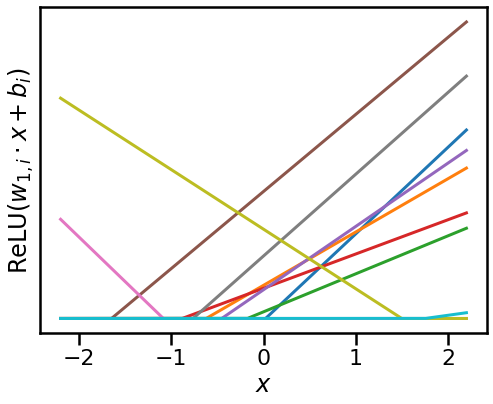

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(np.tile(x[:, None], 10), first_layer_activations.T);
plt.xlabel('$x$');
plt.ylabel('$\operatorname{ReLU}(w_{1,i}\cdot x + b_i)$');
plt.yticks([]);

Now we can look at what happens if we combine these linearly, to form the output of the network. It is a piecewise linear function. For each ReLU, there is a 'kink' in the function, and between these points, the function is linear. I colour coded the location of these kinks corresponding to the individual units above.

Importantly, one ReLU unit adds one 'kink'. Thus, the number of linear segments in the piecewise linear output increases linearly with the number of units. This means that making the network wider by adding more layers is not a very efficient way of increasing the complexity of the functions we can model with them.

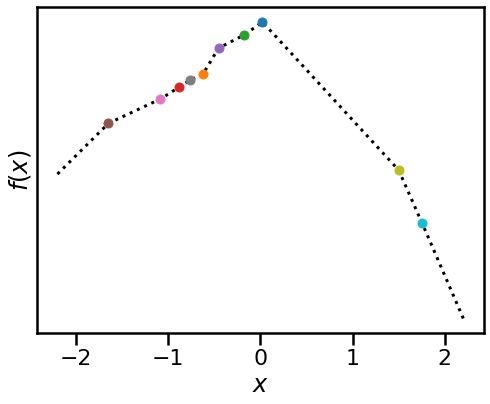

In [ ]:
#output of a single layer network
plt.figure(figsize=(8,6))
plt.plot(x, function_output[0,:],'k:')
boundaries = (-b1/W1).T
f_boundaries =  np.dot(W2.T, relu(W1*boundaries + b1))
plt.plot(boundaries, f_boundaries, '.', markersize=18);
plt.xlabel('$x$');
plt.ylabel('$f(x)$');
plt.yticks([]);

## Deep ReLU network

The cells below illustrate a hand-designed deep ReLU network, which has only two rectified linear units in each layer, yet as the number of layers increases, the number of linear segments (i.e. kinks) in the function increases exponentially.

Mathematically, each layer implements the following function:

$$
f_l(x) = 2\vert f_{l-1}(x)\vert - 2,
$$

with $f_0(x) = x$.

This can of course be implemented using two ReLUs as follows:

$$
2\vert f_{l-1}(x)\vert - 2 = 2 \operatorname{ReLU}(f_{l-1}(x)) + 2 \operatorname{ReLU}(-f_{l-1}(x)) - 2
$$

Let's look at what happens if we keep stacking layers like this on top of one another.

In [ ]:
def layer(t):
  ''' implements a single layer of the "sawtooth" network '''
  return 2*relu(t) + 2*relu(-t) - 2

def multilayer(t, layers=1):
  ''' stacks multiple "sawtooth" layers on top '''
  f = t
  for _ in range(layers):
    f = layer(f)
  return f

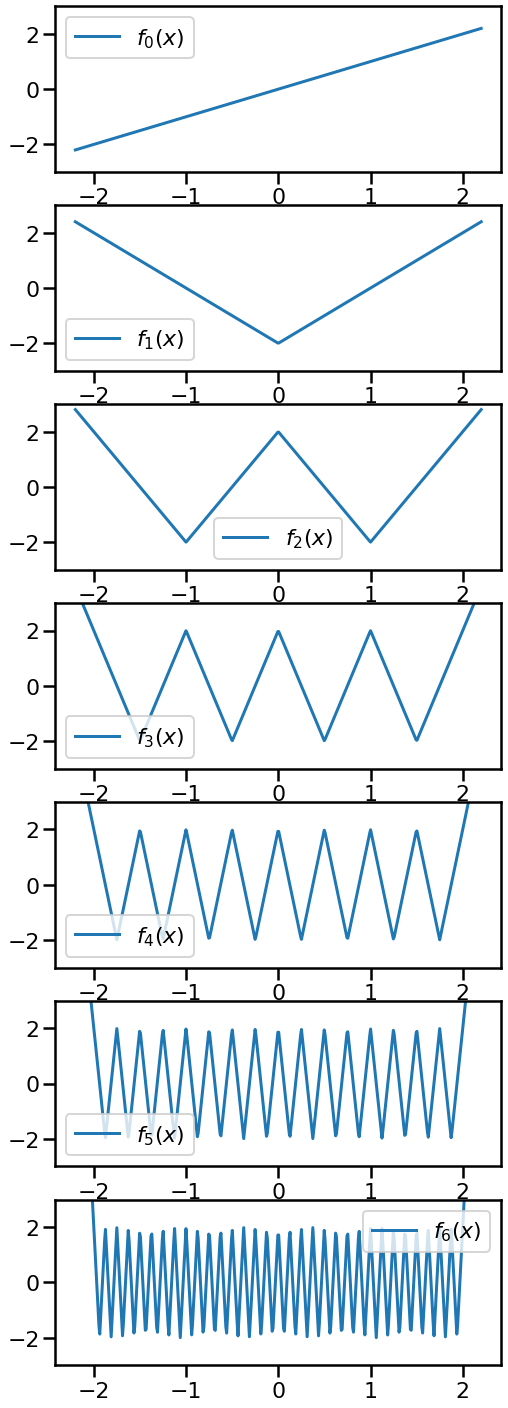

In [ ]:
sns.set_context('poster')
numlayers = 7
fig, axs = plt.subplots(numlayers, 1, figsize=(8,25))
for i, ax in enumerate(axs):
  ax.plot(t, multilayer(t, layers=i))
  ax.set_ylim([-3, 3])
  ax.legend(['$f_{}(x)$'.format(i)])

We see that as the number of layers increases, the number of linear segments in the output increses exponentially. With 0 hidden layers we have 1 segment, it's just the identity function. With 1 hidden layer we split the linear segment into two. With the second layer, we split each linear segment into two once again, ending up with 4 segments. For $l$ layers, and $2l$ ReLUs in total, this network produces a piecewise linear function with $2^l$ segments. This illustrates that stacking layers is a more effective way in increasing the complexity of the model class for ReLU units.

## Optional homework: try this

The above example shows that it is possible to construct examples of deep ReLU netwoks where the complexity of the function grows exponentially. But does it actually happen in random examples? You can investigate this by following up on this example:

1. What happens if I take the 'sawtooth' network above and perturb the weights just sligthly compared to what I prescribed above. How many peaks do you see then? Can you try to work through the maths and predict the expected number of peaks if you add noise to those weights?
1. Draw random neural networks from a simple architecture like the sawtooth network but with random weights. How can you count the number of peaks? If you count the distribution of the number of segments as a function of depth and width, what do you see?